## Importing Libraries

In [1]:
import numpy as np
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, precision_score,recall_score, confusion_matrix,\
                            classification_report, accuracy_score, f1_score

## Loading the images

In [2]:
main_dir = 'C:/Users/sivan/Desktop/ML Projects/Covid-19-Detecting-Using-Chest-X-ray'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')

# Directory with our Train pictures of 3 Classes
train_covid = os.path.join(train_dir, 'Covid')
train_normal = os.path.join(train_dir, 'Normal')
train_pneumonia= os.path.join(train_dir, 'Viral Pneumonia')




# Directory with our Test pictures of 3 Classes
test_covid = os.path.join(test_dir, 'Covid')
test_pneumonia= os.path.join(test_dir, 'Viral Pneumonia')
test_normal = os.path.join(test_dir, 'Normal')

                              
                              
# reading image names of training data                              
train_covid_images = os.listdir(train_covid)
train_normal_images = os.listdir(train_normal)
train_pneumonia_images = os.listdir(train_pneumonia)  

# reading image names of testing data     
test_covid_images = os.listdir(test_covid)
test_normal_images = os.listdir(test_normal)
test_pneumonia_images = os.listdir(test_pneumonia) 



print ('Training Images :{} '.format(len(train_covid_images)+len(train_normal_images)+len(train_pneumonia_images)))
print ('Testing Images  :{} '.format(len(test_covid_images)+len(test_normal_images)+len(test_pneumonia_images)))

Training Images :8034 
Testing Images  :1380 


In [3]:
images=[]
labels=[]

for i in os.listdir(train_dir):
    
    clas =os.path.join(train_dir,i)
    
    for image_path in glob(os.path.join(clas, "*.png")):
        
        images.append(cv2.resize(cv2.imread(image_path),(224,224))/255)
        
        if image_path.split('/')[5].split('\\')[2]=='Covid':
            labels.append('Covid')
        elif image_path.split('/')[5].split('\\')[2]=='Viral Pneumonia':
            labels.append('Viral Pneumonia')
        elif image_path.split('/')[5].split('\\')[2]=='Normal':
            labels.append('Normal')
             


In [4]:
print("The no of Training Examle             : {}".format(len(images)))
print("The no of lables of Training Examples : {}".format(len(labels)))
print("The shape of each Image               : {}".format(images[0].shape))
print("No of Covid Xrays                     : {}".format(len(train_covid_images)))
#print("No of Lung_Opacity Xrays              : {}".format(len(train_lung_opacity_images)))
print("No of Normal Xrays                    : {}".format(len(train_normal_images)))
print("No of Viral Pneumonia Xrays           : {}".format(len(train_pneumonia_images)))
print("No of Covid Xray Labels               : {}".format(labels.count('Covid')))
#print("No of Lung_Opacity Xray Labels        : {}".format(labels.count('Lung_Opacity')))
print("No of Normal Xray Labels              : {}".format(labels.count('Normal')))
print("No of Viral Pneumonia Xray Labels     : {}".format(labels.count('Viral Pneumonia')))

The no of Training Examle             : 8034
The no of lables of Training Examples : 8034
The shape of each Image               : (224, 224, 3)
No of Covid Xrays                     : 1989
No of Normal Xrays                    : 4992
No of Viral Pneumonia Xrays           : 1053
No of Covid Xray Labels               : 1989
No of Normal Xray Labels              : 4992
No of Viral Pneumonia Xray Labels     : 1053


In [5]:
print(labels.index('Covid'))
#print(labels.index('Lung_Opacity'))
print(labels.index('Normal'))
print(labels.index('Viral Pneumonia'))

0
1989
6981


## Unseen Data (For Testing Time)

In [6]:
test_images=[]
test_labels=[]

for i in os.listdir(test_dir):

    clas =os.path.join(test_dir,i)
    
    for image_path in glob(os.path.join(clas, "*.png")):
        
        test_images.append(cv2.resize(cv2.imread(image_path),(224,224))/255)
        
        if image_path.split('/')[5].split('\\')[2]=='Covid':
            test_labels.append('Covid')
        elif image_path.split('/')[5].split('\\')[2]=='Viral Pneumonia':
            test_labels.append('Viral Pneumonia')
        elif image_path.split('/')[5].split('\\')[2]=='Normal':
            test_labels.append('Normal')
        

In [7]:
print("The no of Testing Examle             : {}".format(len(test_images)))
print("The no of lables of Training Examples :{}".format(len(test_labels)))
print("The shape of each Image               : {}".format(test_images[0].shape))
print("No of Covid Xrays                     : {}".format(len(test_covid_images)))
#print("No of Lung_Opacity Xrays              : {}".format(len(test_lung_opacity_images)))
print("No of Normal Xrays                    : {}".format(len(test_normal_images)))
print("No of Viral Pneumonia Xrays           : {}".format(len(test_pneumonia_images)))
print("No of Covid Xray Labels               : {}".format(test_labels.count('Covid')))
#print("No of Lung_Opacity Xray Labels        : {}".format(test_labels.count('Lung_Opacity')))
print("No of Normal Xray Labels              : {}".format(test_labels.count('Normal')))
print("No of Viral Pneumonia Xray Labels     : {}".format(test_labels.count('Viral Pneumonia')))

The no of Testing Examle             : 1380
The no of lables of Training Examples :1380
The shape of each Image               : (224, 224, 3)
No of Covid Xrays                     : 184
No of Normal Xrays                    : 988
No of Viral Pneumonia Xrays           : 208
No of Covid Xray Labels               : 184
No of Normal Xray Labels              : 988
No of Viral Pneumonia Xray Labels     : 208


In [8]:
print(test_labels.index('Covid'))
#print(test_labels.index('Lung_Opacity'))
print(test_labels.index('Normal'))
print(test_labels.index('Viral Pneumonia'))

0
184
1172


# Onehot encoding for Trainingdata

In [9]:

images = np.array(images,dtype='float32')



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)



onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
labels=onehot_encoded



print(type(images))
print(type(labels))
print("*"*30)
print(images.shape)
print(labels.shape)
print("*"*30)

[0 0 0 ... 2 2 2]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
******************************
(8034, 224, 224, 3)
(8034, 3)
******************************


# Onehot encoding for Testingdata

In [10]:
test_images = np.array(test_images,dtype='float32')



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_labels)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
test_labels=onehot_encoded



print(type(test_images))
print(type(test_labels))

[0 0 0 ... 2 2 2]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
print(test_images.shape)
print(test_labels.shape)

(1380, 224, 224, 3)
(1380, 3)


In [12]:
X_train, X_val= train_test_split(images, test_size=0.2, random_state=42)
y_train, y_val= train_test_split(labels, test_size=0.2, random_state=42)

print (X_train.shape)
print (y_train.shape)
print (X_val.shape)
print (y_val.shape)

(6427, 224, 224, 3)
(6427, 3)
(1607, 224, 224, 3)
(1607, 3)


### Sample Images

AxesImage(54,36;334.8x217.44)
[0. 1. 0.]


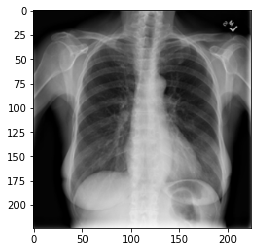

In [13]:

print(plt.imshow(X_train[10]))
print(y_train[0])

AxesImage(54,36;334.8x217.44)
[1. 0. 0.]


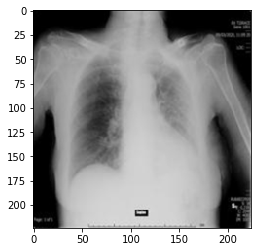

In [14]:
print(plt.imshow(X_train[6000]))
print(y_train[6000])

AxesImage(54,36;334.8x217.44)
[0. 1. 0.]


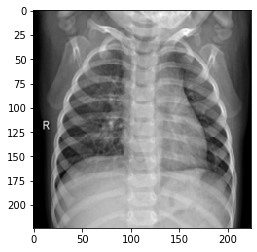

In [15]:
print(plt.imshow(X_train[3500]))
print(y_train[3500])

AxesImage(54,36;334.8x217.44)
[0. 1. 0.]


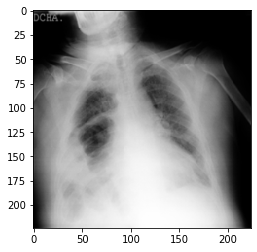

In [16]:
print(plt.imshow(X_train[500]))
print(y_train[5000])

# Traing samples vs Validation Samples

In [17]:
c=(y_train[:,0] == 1).sum()
n=(y_train[:,1] == 1).sum()
p=(y_train[:,2] == 1).sum()

print('Covid samples in training             : {}'.format(c)) #covid
print('Normal samples in training            : {}'.format(n)) # Normal
print('Viral Pneumonia samples in training   : {}'.format(p)) # Viral Pneumonia

C=(y_val[:,0] == 1).sum()
N=(y_val[:,1] == 1).sum()
P=(y_val[:,2] == 1).sum()


print("*"*45)
print('Covid samples in validation            : {}'.format(C)) #covid
print('Normal samples in validation           : {}'.format(N)) # Normal
print('Viral Pneumonia samples in validation  : {}'.format(P)) # Viral Pneumonia

Covid samples in training             : 1574
Normal samples in training            : 4008
Viral Pneumonia samples in training   : 845
*********************************************
Covid samples in validation            : 415
Normal samples in validation           : 984
Viral Pneumonia samples in validation  : 208


In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(6427, 224, 224, 3)
(6427, 3)
(1607, 224, 224, 3)
(1607, 3)


## InceptionV3 

In [23]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)


x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64  ,activation='relu')(x)
x = Dense(32  ,activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)


model1 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model1.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model1.fit(X_train,y_train,batch_size=50,epochs=6,validation_data=(X_val,y_val))

Epoch 1/6
129/129 [==============================] - 529s 4s/step - loss: 0.4143 - accuracy: 0.8274 - val_loss: 0.2800 - val_accuracy: 0.8961
Epoch 2/6
129/129 [==============================] - 421s 3s/step - loss: 0.2863 - accuracy: 0.8856 - val_loss: 0.2473 - val_accuracy: 0.9091
Epoch 3/6
129/129 [==============================] - 409s 3s/step - loss: 0.2337 - accuracy: 0.9113 - val_loss: 0.2380 - val_accuracy: 0.9154
Epoch 4/6
129/129 [==============================] - 412s 3s/step - loss: 0.2094 - accuracy: 0.9217 - val_loss: 0.2214 - val_accuracy: 0.9216
Epoch 5/6
129/129 [==============================] - 414s 3s/step - loss: 0.1927 - accuracy: 0.9281 - val_loss: 0.2391 - val_accuracy: 0.9179
Epoch 6/6
129/129 [==============================] - 413s 3s/step - loss: 0.1859 - accuracy: 0.9295 - val_loss: 0.2529 - val_accuracy: 0.9172


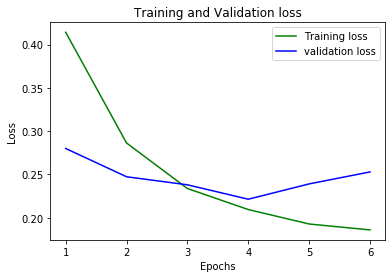

In [24]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

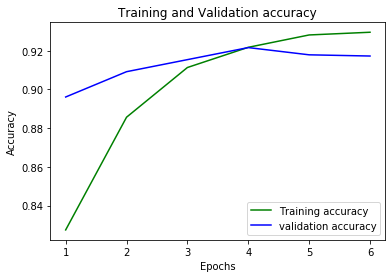

In [25]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
y_hat1=model1.predict(test_images)
y_hat1=np.argmax(y_hat1,axis=1)
test_labels1=np.argmax(test_labels,axis=1)
print(test_labels1.shape)
print(y_hat1.shape)
print("*"*45)
print("Acuuracy on the test data : {}" .format(accuracy_score(test_labels1,y_hat1)))

(1391,)
(1391,)
*********************************************
Acuuracy on the test data : 0.8526240115025162


# DenseNet121

In [27]:
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)


model2 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model2.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history2=model2.fit(X_train,y_train,batch_size=50,epochs=6,validation_data=(X_val,y_val))

Epoch 1/6
129/129 [==============================] - 689s 5s/step - loss: 0.3460 - accuracy: 0.8656 - val_loss: 0.2617 - val_accuracy: 0.8967
Epoch 2/6
129/129 [==============================] - 700s 5s/step - loss: 0.2101 - accuracy: 0.9196 - val_loss: 0.2161 - val_accuracy: 0.9191
Epoch 3/6
129/129 [==============================] - 700s 5s/step - loss: 0.1743 - accuracy: 0.9325 - val_loss: 0.1937 - val_accuracy: 0.9247
Epoch 4/6
129/129 [==============================] - 686s 5s/step - loss: 0.1618 - accuracy: 0.9417 - val_loss: 0.1648 - val_accuracy: 0.9440
Epoch 5/6
129/129 [==============================] - 670s 5s/step - loss: 0.1716 - accuracy: 0.9354 - val_loss: 0.2797 - val_accuracy: 0.8992
Epoch 6/6
129/129 [==============================] - 877s 7s/step - loss: 0.1482 - accuracy: 0.9435 - val_loss: 0.1711 - val_accuracy: 0.9353


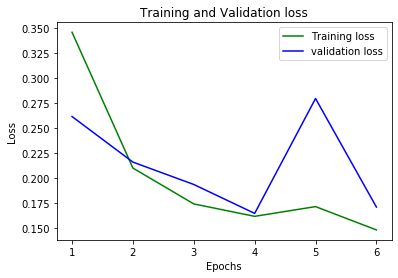

In [31]:
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

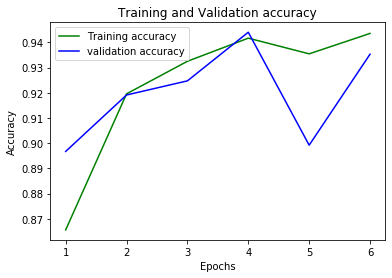

In [32]:
loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
y_hat2=model2.predict(test_images)
y_hat2=np.argmax(y_hat2,axis=1)
test_labels2=np.argmax(test_labels,axis=1)`
print(test_labels2.shape)
print(y_hat2.shape)
print("*"*45)
print("Acuuracy on the test data : {}" .format(accuracy_score(test_labels2,y_hat2)))

(1391,)
(1391,)
*********************************************
Acuuracy on the test data : 0.9065420560747663


In [36]:
model2.save('C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray\assets


# VGG-16

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16


base_model =VGG16(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)




predictions = Dense(3, activation='softmax')(x)


model3 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model3.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(X_train,y_train,batch_size=100,epochs=6,validation_data=(X_val,y_val))

Epoch 1/6
65/65 [==============================] - 2072s 32s/step - loss: 0.6857 - accuracy: 0.6999 - val_loss: 0.4867 - val_accuracy: 0.8108
Epoch 2/6
65/65 [==============================] - 1858s 29s/step - loss: 0.3834 - accuracy: 0.8530 - val_loss: 0.3399 - val_accuracy: 0.8650
Epoch 3/6
65/65 [==============================] - 1966s 30s/step - loss: 0.3136 - accuracy: 0.8765 - val_loss: 0.2544 - val_accuracy: 0.9060
Epoch 4/6
65/65 [==============================] - 1819s 28s/step - loss: 0.2437 - accuracy: 0.9101 - val_loss: 0.2504 - val_accuracy: 0.9029
Epoch 5/6
65/65 [==============================] - 1799s 28s/step - loss: 0.2425 - accuracy: 0.9079 - val_loss: 0.2730 - val_accuracy: 0.8979
Epoch 6/6
65/65 [==============================] - 1817s 28s/step - loss: 0.2058 - accuracy: 0.9220 - val_loss: 0.2452 - val_accuracy: 0.9123


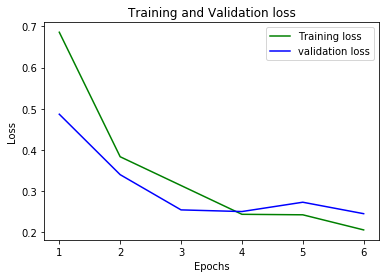

In [38]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

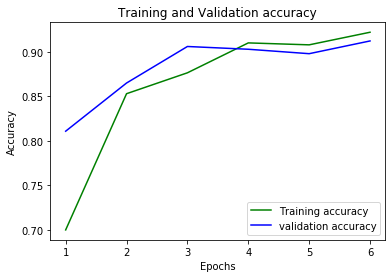

In [39]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
y_hat3=model3.predict(test_images)
y_hat3=np.argmax(y_hat3,axis=1)
test_labels3=np.argmax(test_labels,axis=1)
print(test_labels3.shape)
print(y_hat3.shape)
print("*"*45)
print("Acuuracy on the test data : {}" .format(accuracy_score(test_labels3,y_hat3)))

(1391,)
(1391,)
*********************************************
Acuuracy on the test data : 0.8749101365923796


# InceptionV3 (10 epochs)

In [41]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dense(64  ,activation='relu')(x)
x = Dense(32  ,activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)


model4 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model4.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model4.fit(X_train,y_train,batch_size=50,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
129/129 [==============================] - 397s 3s/step - loss: 0.3995 - accuracy: 0.8346 - val_loss: 0.3134 - val_accuracy: 0.8724
Epoch 2/10
129/129 [==============================] - 395s 3s/step - loss: 0.2598 - accuracy: 0.9042 - val_loss: 0.2517 - val_accuracy: 0.9023
Epoch 3/10
129/129 [==============================] - 395s 3s/step - loss: 0.2342 - accuracy: 0.9101 - val_loss: 0.2886 - val_accuracy: 0.8973
Epoch 4/10
129/129 [==============================] - 396s 3s/step - loss: 0.2172 - accuracy: 0.9166 - val_loss: 0.2522 - val_accuracy: 0.9017
Epoch 5/10
129/129 [==============================] - 394s 3s/step - loss: 0.1992 - accuracy: 0.9264 - val_loss: 0.2459 - val_accuracy: 0.9172
Epoch 6/10
129/129 [==============================] - 395s 3s/step - loss: 0.1797 - accuracy: 0.9289 - val_loss: 0.2366 - val_accuracy: 0.9160
Epoch 7/10
129/129 [==============================] - 394s 3s/step - loss: 0.1627 - accuracy: 0.9407 - val_loss: 0.2532 - val_accuracy: 0.9123

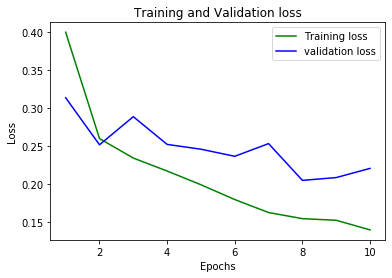

In [42]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

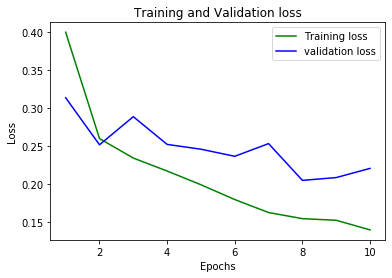

In [43]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
y_hat4=model4.predict(test_images)
y_hat4=np.argmax(y_hat4,axis=1)
test_labels4=np.argmax(test_labels,axis=1)
print(test_labels4.shape)
print(y_hat4.shape)
print("*"*45)
print("Acuuracy on the test data : {}" .format(accuracy_score(test_labels4,y_hat4)))

(1391,)
(1391,)
*********************************************
Acuuracy on the test data : 0.8691588785046729


# DenseNet121 (10 epochs)

In [45]:

base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)


predictions = Dense(3, activation='softmax')(x)


model5 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model5.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model5.fit(X_train,y_train,batch_size=50,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
129/129 [==============================] - 759s 6s/step - loss: 0.3806 - accuracy: 0.8506 - val_loss: 0.2280 - val_accuracy: 0.9166
Epoch 2/10
129/129 [==============================] - 733s 6s/step - loss: 0.2344 - accuracy: 0.9105 - val_loss: 0.1969 - val_accuracy: 0.9291
Epoch 3/10
129/129 [==============================] - 727s 6s/step - loss: 0.1792 - accuracy: 0.9350 - val_loss: 0.1883 - val_accuracy: 0.9266
Epoch 4/10
129/129 [==============================] - 724s 6s/step - loss: 0.1594 - accuracy: 0.9426 - val_loss: 0.1709 - val_accuracy: 0.9328
Epoch 5/10
129/129 [==============================] - 722s 6s/step - loss: 0.1330 - accuracy: 0.9504 - val_loss: 0.2016 - val_accuracy: 0.9253
Epoch 6/10
129/129 [==============================] - 722s 6s/step - loss: 0.1266 - accuracy: 0.9507 - val_loss: 0.1447 - val_accuracy: 0.9452
Epoch 7/10
129/129 [==============================] - 725s 6s/step - loss: 0.1222 - accuracy: 0.9536 - val_loss: 0.1752 - val_accuracy: 0.9359

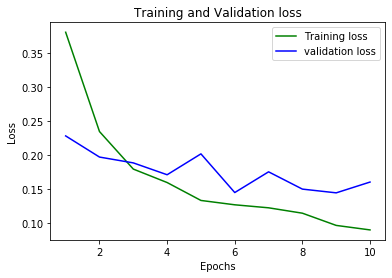

In [46]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

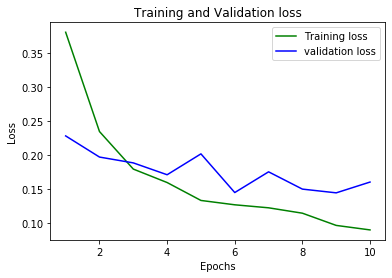

In [47]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
y_hat5=model5.predict(test_images)
y_hat5=np.argmax(y_hat5,axis=1)
test_labels5=np.argmax(test_labels,axis=1)
print(test_labels5.shape)
print(y_hat5.shape)
print("*"*45)
print("Acuuracy on the test data : {}" .format(accuracy_score(test_labels5,y_hat5)))

(1391,)
(1391,)
*********************************************
Acuuracy on the test data : 0.9094176851186196


In [49]:
model5.save('C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray/model5.h5')

# VGG-16 (10 Epochs)

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16


base_model =VGG16(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)



predictions = Dense(3, activation='softmax')(x)


model6 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model6.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model6.fit(X_train,y_train,batch_size=50,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
129/129 [==============================] - 1824s 14s/step - loss: 0.5658 - accuracy: 0.7672 - val_loss: 0.3823 - val_accuracy: 0.8370
Epoch 2/10
129/129 [==============================] - 1949s 15s/step - loss: 0.3208 - accuracy: 0.8785 - val_loss: 0.2747 - val_accuracy: 0.8986
Epoch 3/10
129/129 [==============================] - 2107s 16s/step - loss: 0.2697 - accuracy: 0.8962 - val_loss: 0.3554 - val_accuracy: 0.8569
Epoch 4/10
129/129 [==============================] - 1927s 15s/step - loss: 0.2393 - accuracy: 0.9068 - val_loss: 0.2011 - val_accuracy: 0.9228
Epoch 5/10
129/129 [==============================] - 2048s 16s/step - loss: 0.2005 - accuracy: 0.9244 - val_loss: 0.2241 - val_accuracy: 0.9228
Epoch 6/10
129/129 [==============================] - 2012s 16s/step - loss: 0.1831 - accuracy: 0.9315 - val_loss: 0.1801 - val_accuracy: 0.9440
Epoch 7/10
129/129 [==============================] - 2025s 16s/step - loss: 0.1763 - accuracy: 0.9334 - val_loss: 0.1776 - val_ac

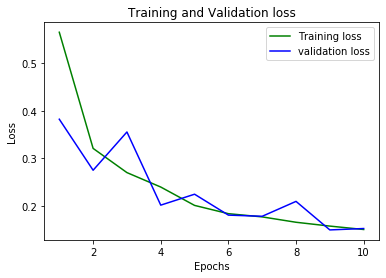

In [51]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

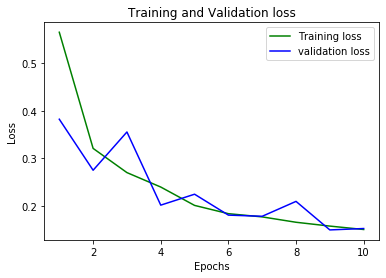

In [52]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:
y_hat6=model6.predict(test_images)
y_hat6=np.argmax(y_hat6,axis=1)
test_labels6=np.argmax(test_labels,axis=1)
print(test_labels6.shape)
print(y_hat6.shape)
print("*"*45)
print("Acuuracy on the test data : {}" .format(accuracy_score(test_labels6,y_hat6)))

(1391,)
(1391,)
*********************************************
Acuuracy on the test data : 0.9130122214234364


In [96]:
model6.save('C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray/model6.h5')